##### OpenCV 五官偵測 ( 眼睛、鼻子、嘴巴 )
這篇教學會介紹使用 OpenCV，搭配眼睛、嘴巴和鼻子的特徵模型，偵測影像中人的五官，並透過繪製形狀的方式，\
使用方框標記偵測到的眼睛、鼻子和嘴巴，實現類似 AI 影像辨識的效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 下載人臉特徵模型 
從下方網址下載對應的特徵模型，下載後將 xml 檔案和 Python 的程式檔放在同一層目錄下。

[OpenCV 官方 Github](https://github.com/opencv/opencv/tree/4.x/data)\
[atduskgreg Github](https://github.com/atduskgreg/opencv-processing/tree/master/lib/cascade-files)\
[眼睛特徵模型](haarcascade_eye.xml)\
[嘴巴特徵模型](haarcascade_mcs_mouth.xml)\
[鼻子特徵模型](haarcascade_mcs_nose.xml)

##### 偵測眼睛、鼻子和嘴巴 
下方的例子執行後，會偵測圖片中人的眼睛、鼻子和嘴巴，並透過繪製形狀的方式，使用方框標記偵測到的人臉，通常鼻子和嘴巴的準確度較低，\
容易偵測到其他類似的形狀，至於眼睛的準確度則較高 ( 圖片使用海倫娜弗爾曼肖像 )。

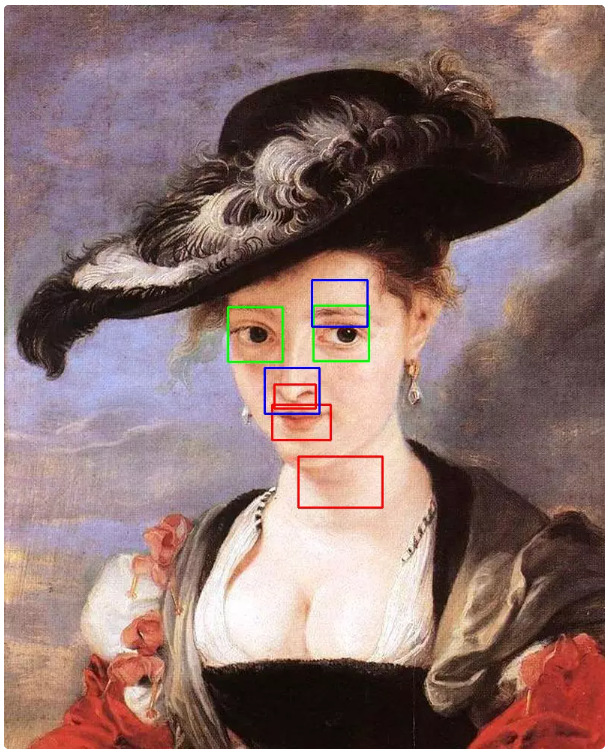

In [3]:
import cv2
img = cv2.imread(r'Img\Face\1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # 圖片轉灰階
#gray = cv2.medianBlur(gray, 5)                # 如果一直偵測到雜訊，可使用模糊的方式去除雜訊

eye_cascade = cv2.CascadeClassifier(r"Model\3\haarcascade_eye.xml")  # 使用眼睛模型
eyes = eye_cascade.detectMultiScale(gray)                       # 偵測眼睛
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)      # 標記綠色方框

mouth_cascade = cv2.CascadeClassifier(r"Model\3\haarcascade_mcs_mouth.xml")  # 使用嘴巴模型
mouths = mouth_cascade.detectMultiScale(gray)                           # 偵測嘴巴
for (x, y, w, h) in mouths:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)              # 標記紅色方框

nose_cascade = cv2.CascadeClassifier(r"Model\3\haarcascade_mcs_nose.xml")    # 使用鼻子模型
noses = nose_cascade.detectMultiScale(gray)                             # 偵測鼻子
for (x, y, w, h) in noses:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)              # 標記藍色方框

cv2.imshow('oxxostudio', img)
cv2.waitKey(0)   # 按下任意鍵停止
cv2.destroyAllWindows()

##### 即時偵測影片中的五官 
延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章的範例，搭配上述的偵測方法，就可以即時偵測攝影鏡頭裡的眼睛、鼻子和嘴巴。

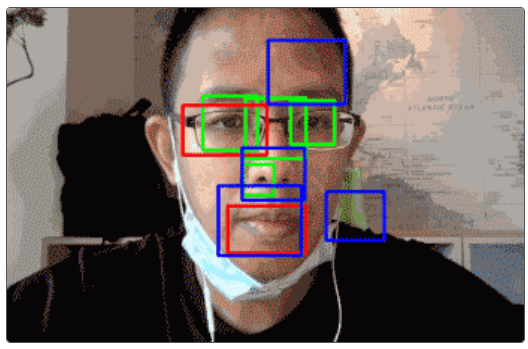

In [ ]:
import cv2

# 初始化攝像頭
cap = cv2.VideoCapture(0)

# 載入眼睛、嘴巴和鼻子偵測模型
eye_cascade = cv2.CascadeClassifier(r"Model/3/haarcascade_eye.xml")          # 使用眼睛模型
mouth_cascade = cv2.CascadeClassifier(r"Model/3/haarcascade_mcs_mouth.xml")  # 使用嘴巴模型
nose_cascade = cv2.CascadeClassifier(r"Model/3/haarcascade_mcs_nose.xml")    # 使用鼻子模型

# 檢查攝像頭是否打開
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # 讀取影像
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break

    # 縮小尺寸，避免尺寸過大導致效能不好
    img = cv2.resize(frame, (540, 320))

    # 將影像進行中值模糊處理
    gray = cv2.medianBlur(img, 3)

    # 將影像轉換成灰階
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)

    # 再次進行中值模糊處理
    gray = cv2.medianBlur(gray, 5)

    # 偵測眼睛
    eyes = eye_cascade.detectMultiScale(gray)
    for (x, y, w, h) in eyes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)  # 用綠色矩形標記眼睛

    # 偵測嘴巴
    mouths = mouth_cascade.detectMultiScale(gray)
    for (x, y, w, h) in mouths:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)  # 用紅色矩形標記嘴巴

    # 偵測鼻子
    noses = nose_cascade.detectMultiScale(gray)
    for (x, y, w, h) in noses:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)  # 用藍色矩形標記鼻子

    # 顯示影像
    cv2.imshow('oxxostudio', img)

    # 按下 'q' 鍵退出
    if cv2.waitKey(1) == ord('q'):
        break

# 釋放攝像頭並關閉所有視窗
cap.release()
cv2.destroyAllWindows()